<a href="https://colab.research.google.com/github/mariron42/FisicaComputacional-1/blob/main/Actividad%208/%20Act_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 8**
----
Marcel Herrera Rendón 

In [2]:
#importar librerías necesarias 
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt


In [3]:
# Definir el Metodo de Euler:


def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

**Ejercicio 1:**

Resuelva la ecuación diferencial del [oscilador de Van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)

\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}

donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal. 

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

In [4]:
#Definir el osilador 
def oscilador(y,t,mu):
  x, v = y

  dydt = [v, -x+mu*v*(1-x**2)]
  return dydt


mu =  0


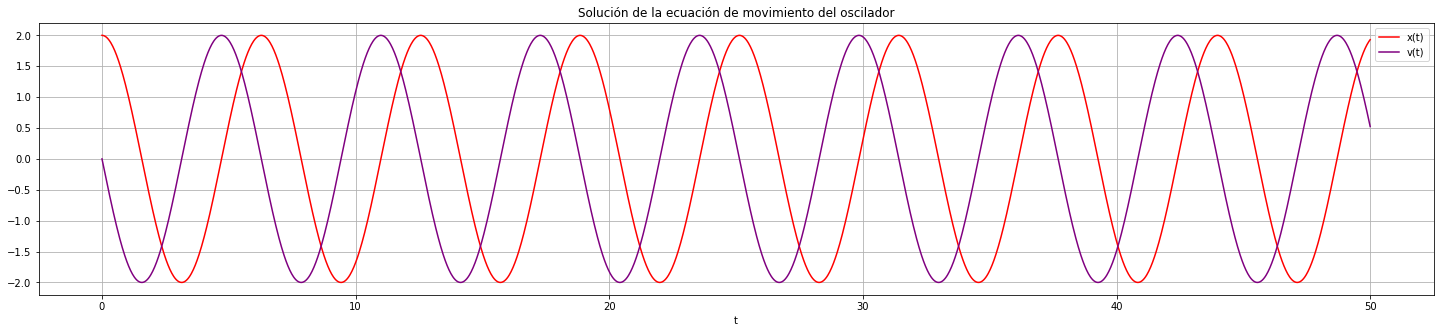

mu =  1


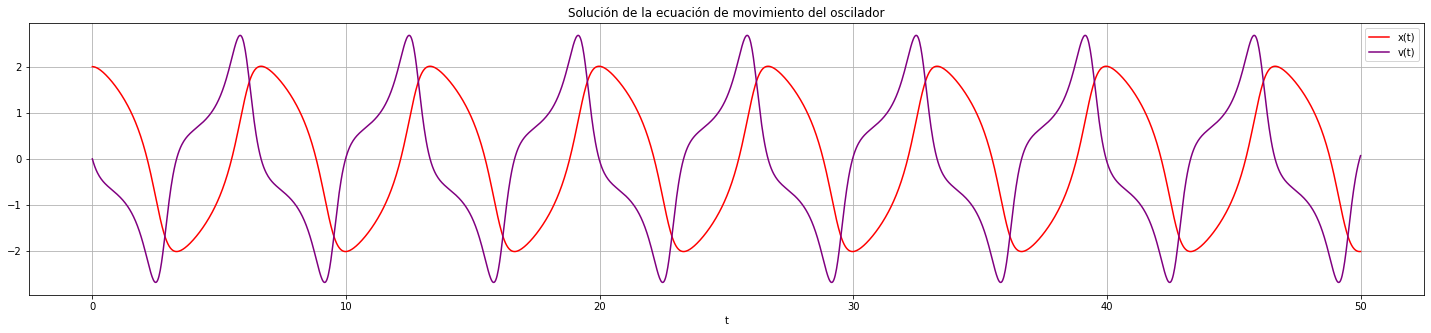

mu =  2


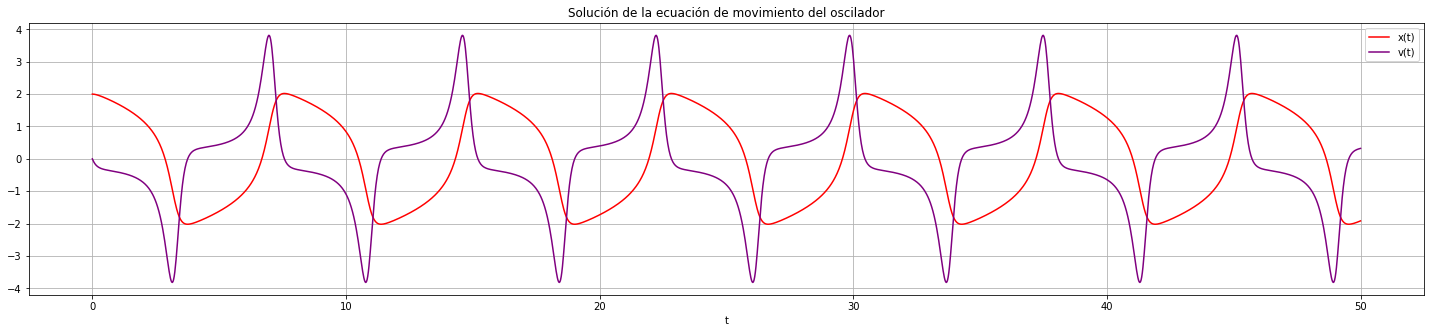

mu =  3


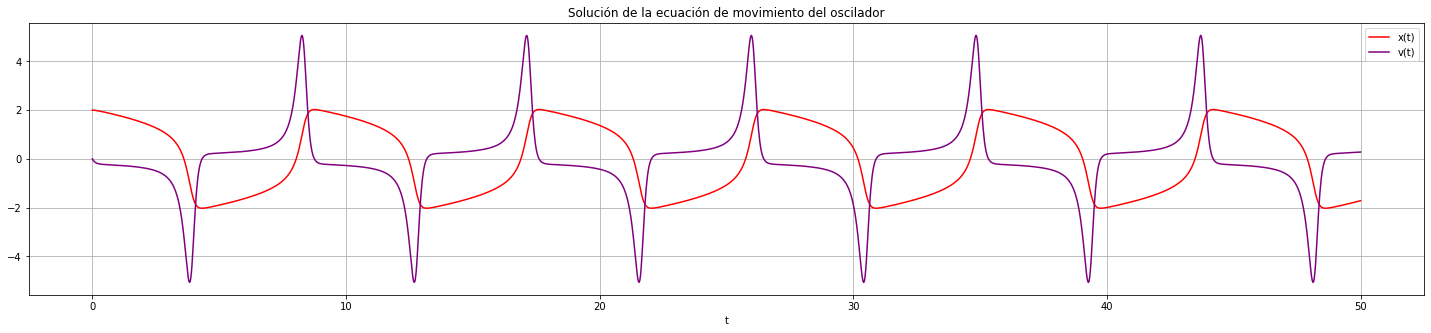

mu =  4


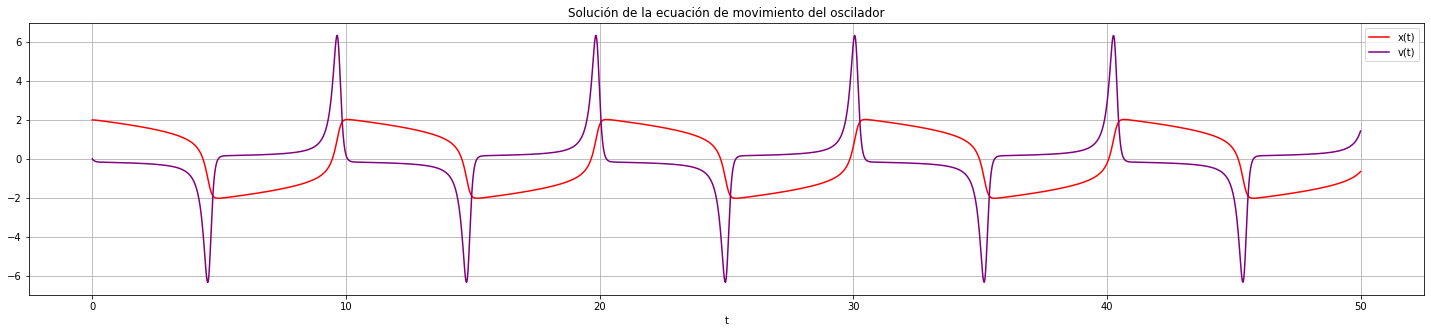

In [5]:
#Definir tiempo de integración:
t = np.linspace(0,50,2000)
#np.linspce(inicial,final,pasos)

# Condiciones iniciales:
y0 = [2,0] # Posición inicial x = 2, partiendo del reposo v=0
# Utilizamos ODEINT para mu = 0

for mu in range(5):
  print("mu = ", mu)
  
  y = odeint(oscilador, y0, t, args=(mu,))
  plt.figure(figsize=(25,5))
  plt.plot(t, y[:, 0], 'b', label='x(t)', color = "red")
  plt.plot(t, y[:, 1], 'g', label='v(t)', color = "purple")
  plt.legend(loc='best')
  plt.title("Solución de la ecuación de movimiento del oscilador")
  plt.xlabel('t')
  plt.grid()
  plt.show()

**Ejercicio 2:**

Siguiendo con el ejemplo anterior del [oscilador de Van de Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator), reproduce la gráfica del [plano fase](https://en.wikipedia.org/wiki/Phase_plane) ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.

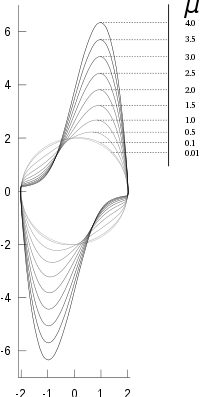

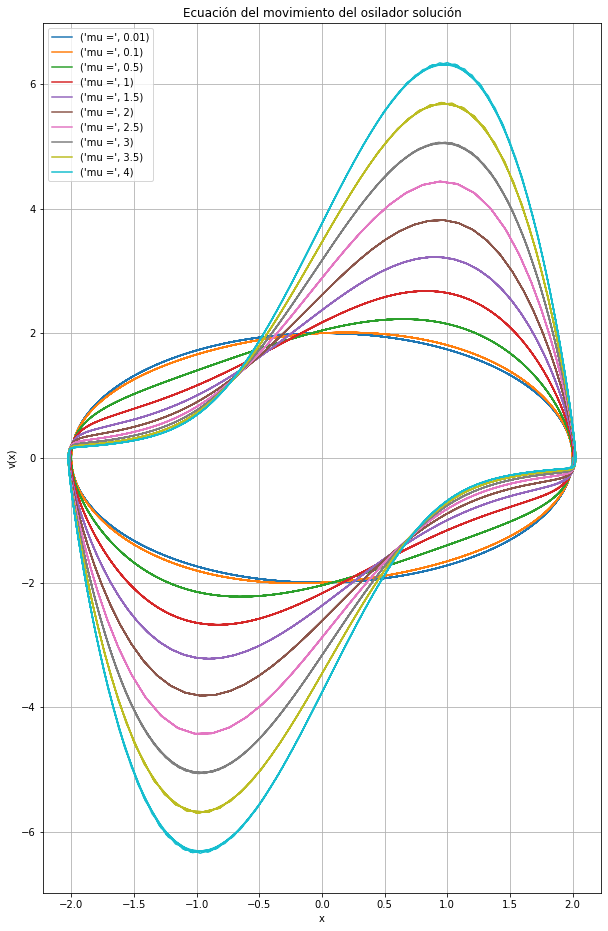

In [6]:
#Definir el tiempo de integración 
t= np.linspace(0,50,1600)

#Presentar la figura y elegir tamaños
plt.figure (figsize=(10,16))

#Usar la fimción for para sacar todas las situacipones a la vez
for mu in [0.01,0.1,0.5,1,1.5,2,2.5,3,3.5,4]:
  y=odeint(oscilador, y0,t,args=(mu,))
  plt.plot(y[:,0], y[:,1],label=("mu =", mu))

plt.legend(loc="best")
plt.title("Ecuación del movimiento del osilador solución")
plt.xlabel("x")
plt.ylabel("v(x)")
plt.grid()
plt.show()


**Ejercicios 3:**

Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:


*   Método de Euler
*   Método de Runge-Kutta RK4
*   Función *scipy.integrate.odeint* ó *scipy.integrate-solve_ivp*

Grafique las soluciones como funciones del tiempo.

In [7]:
#Definir el metodo de Ronge-Kutta 4
def runge_kutta(f,x_0, y_0, h):
 #Resuelve EDOs de primer orden 

 k_0 = f(x_0, y_0)
 k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
 k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
 k_3 = f(x_0 + h, y_0 + h * k_2)

 k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

 x_1 = x_0 + h
 y_1 = y_0 + h * k

 return x_1, y_1

**Ejercicio 3.1:** 

\begin{equation*}
\frac{d^2 x}{dt^2} + k (\frac{dx}{dt})^2 -g = 0, \ x(0)=0, \ \frac{dx}{dt}(0). = 0, \ k>0.
\end{equation*}

In [8]:
# EJERCICIO 3.1

#EN ESTA CELDA VAMOS A DEFINIR LAS ECUACIONES Y VALORES QUE SE OCUPAN EN TODOS LOS METODOS 

# Se define la ecuación:
def cl(y, t, k, g):
        x, v = y
        dydt = [v, -k*v**2 + g]
        return dydt

#Parametros para el problema 
t = np.linspace(0, 2, 54)
t0 = 0
x0 = 0
v0 = 0

k = 1
g = 9.81
#Definir la ecuación despejando la segunda derivada 
f = lambda v, t: -k*v**2 + g 


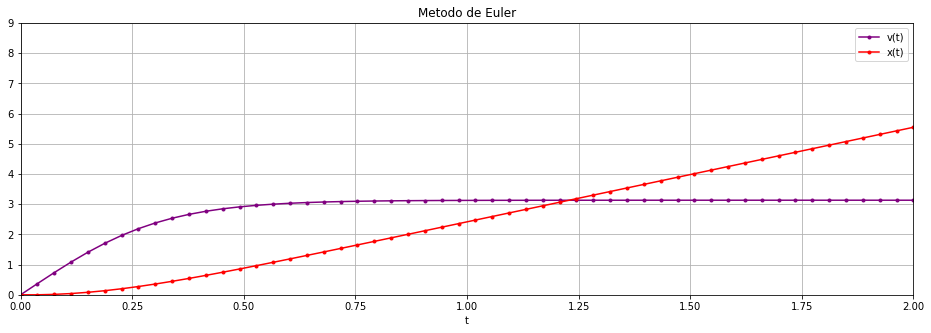

In [9]:
# Método de Euler
#Definir la ecuación despejando la segunda derivada 
f = lambda v, t: -k*v**2 + g 
###################################
#Aplicamos el medtodo de euler para v
v = odeEuler (f,v0,t)

# Modificamos el metodo de euler para resolver la segunda ecuación 
x = np.zeros(len(t))
x[0] = x0


for n in range(0,len(t)-1):
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])
######################################

#Graficar 
plt.figure(figsize=(16,5))
plt.plot(t,v,"b.-", color= "purple")
plt.plot(t,x,"g.-", color= "red")
plt.legend(["v(t)", "x(t)"])
plt.title("Metodo de Euler")
plt.axis([0,2,0,9])
plt.grid()
plt.xlabel("t")
plt.show()

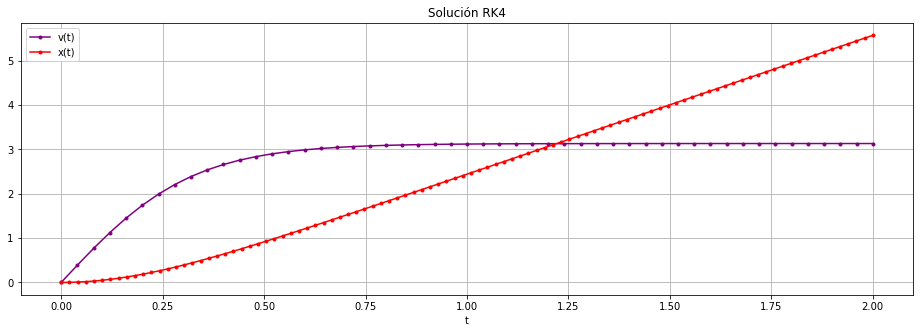

In [10]:
# Método de Runge-Kutta RK4

##############################################
#Definir paramentros 
a = 0
b = 2.0 
Npts = 50
h = (b-a)/Npts
#Estos ya estaban 
#t0 = 0
#x0 = 0
#v0 = 0

t=0
v=0
###############################################






# Resolver la primera ecuación
f = lambda t,v: -k*v**2 + g #La volvemos a definir, intneté usar la que estaba definidsa en celdas enteriores pero me da errores
t_values = [t0]
v_values = [v0]


#Usando RK 4
for _ in range(Npts):
  t, v = runge_kutta(f, t, v, h)

  t_values.append(t)
  v_values.append(v)

#SEGUNDA ECUACIÓN
####################################################################################
# usaremos solve_ivp para esta ecuación porque no la pude resolver por otros metodos

# definimos la función F de lado derecho de la ecuación.
def VanderPol(t,y,k,g):
      dydt = [y[1], -k*(y[1])**2 + g]
      return dydt
#Tiempo de integración y pasos
t0=0
tmax=2
Npts=100
# Condiciones iniciales
t_0 = 0.0
y_0 = [x0, v0]


#definir el tiempo de imtegración 
t = np.linspace(t0,tmax,Npts)

abserr = 1.0e-8
relerr = 1.0e-6

sol = solve_ivp(lambda t, y, mu: VanderPol(t, y, k, g),(t0,tmax), y0=y_0, 
                method='RK45', t_eval=t, args=(mu,), rtol=relerr, atol=abserr)
x=sol.y[0]

#Graficar 
plt.figure(figsize=(16,5))

plt.plot(t_values,v_values,'b.-', label='v(t)', color= "purple") #Linea y puntos de V

plt.plot(t,x,'g.-', label='x(t)', color="red")#Linea y puntos de x

plt.legend(loc='best')
plt.grid()
plt.title("Solución RK4")
plt.xlabel('t')
plt.show()

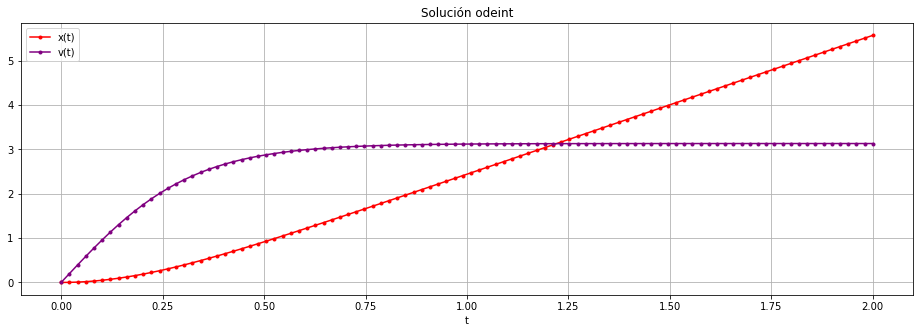

In [11]:
# Método ODEINT
#Valores de tiempo y pasos 
#Sé que están definidos anteriormente pero creo que para alguien que lee el codigo puede ser confuso
t0=0
tmax=2.0
Npts=100
t = np.linspace(t0,tmax,Npts)

#Condiciones iniciales 
x_0 = 0.0
a_0 = [0.0, 0.0]

# Definimos los errores de tolerancia para la solución


#Aplicamos odeint
sol=odeint(cl, a_0, t, args=(k,g))
#print(t)
#print(sol[:,0],sol[:,1])

# Se obtiene tanto x(t) como v(t)
y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(16,5))
plt.plot(t, y1, 'b.-', label='x(t)', color="red")
plt.plot(t, y2, 'g.-', label='v(t)', color="purple")
plt.legend(loc='best')
plt.title('Solución odeint')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 3.2:**

\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}




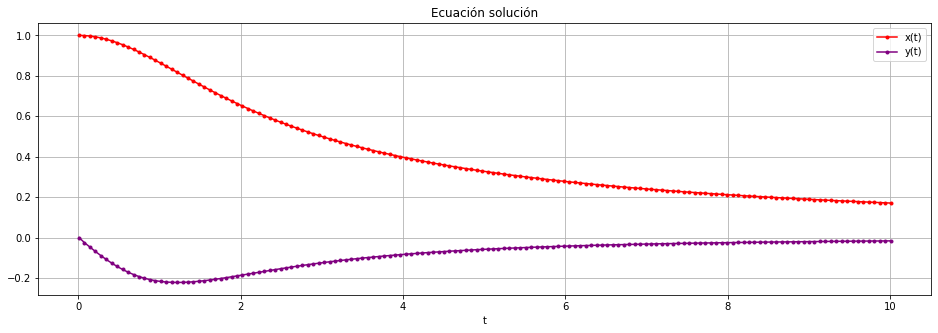

In [12]:
#Definimos la ecuación del ejercicio 3.2
def fun2(a, x):
        y, v = a
        dadx = [v, -(2/x)*v -y**5]
        return dadx

#Definimos los valores que utilizaremos 
v0=0
x0=0.1
y0=1.0
x=np.linspace(0.01,10.01,150)
x_0=x0
a_0=[y0,v0]
#parametros para atol y rtol
abserr=1.0e-8
relerr=1.0e-6

#Obtenr las soluciones }
sol=odeint(fun2,a_0,x,atol=abserr,rtol=relerr)
#Soluciones 
xt=sol[:,0]
yt=sol[:,1]

#Graficar
plt.figure(figsize=(16,5))
plt.plot(x,xt,"b.-",label="x(t)",color="red")
plt.plot(x,yt,"g.-",label="y(t)",color="purple")
plt.legend(loc="best")
plt.title("Ecuación solución")
plt.xlabel("t")
plt.grid()
plt.show()

**Ejercicio 3.3:**

\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}

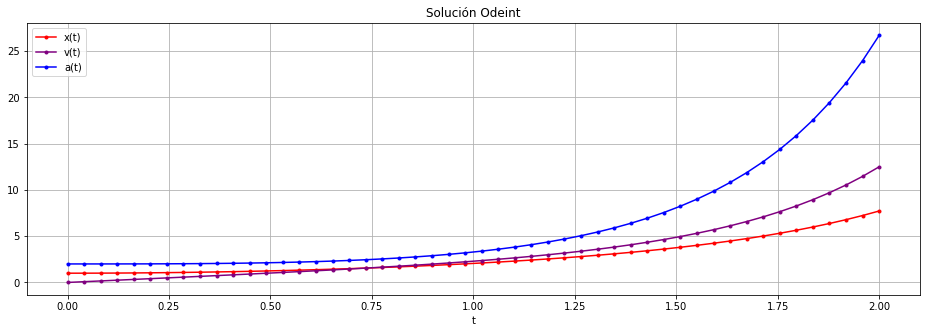

In [16]:
def fun3(b, x):
        y, v, a = b
        dbdx = [v, a, (x-1)**2 + y**2 + v - 2]
        return dbdx
###############Definir valores inicales##########################3
v0 = 0.0
a0 = 2.0
x0 = 0.0
y0 = 1.0

x = np.linspace(0.0, 2.0, 50)
x_0 = x0
a_0 = [y0, v0, a0]


abserr = 1.0e-8
relerr = 1.0e-6

sol=odeint(fun3, a_0, x, atol=abserr, rtol=relerr)


#Ahora se llegan ecuaciones de nivel 3
xt=sol[:,0]
vt=sol[:,1]
at=sol[:,2]

#Graficar 
plt.figure(figsize=(16,5))
plt.plot(x, xt, 'b.-', label='x(t)', color="Red")
plt.plot(x, vt, 'g.-', label='v(t)', color= "purple")
plt.plot(x, at, 'y.-', label='a(t)', color= "blue")
plt.legend(loc='best')
plt.title('Solución Odeint')
plt.xlabel('t')
plt.grid()
plt.show()